# Week 6 Mini Project - Loan Eligibility

Dooinn Kim

![Image Description](https://images.unsplash.com/photo-1499750310107-5fef28a66643?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=2670&q=80)


### Context

Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers.

### Feature Description

- **Loan_ID**:	Unique Loan ID
- **Gender**:	Male/ Female
- **Married**:	Applicant married (Y/N)
- **Dependents**:	Number of dependents
- **Education**:	Applicant Education (Graduate/ Under Graduate)
- **Self_Employed**:	Self employed (Y/N)
- **Applicant Income**:	Applicant income
- **Coapplicant Income**:	Coapplicant income
- **Loan Amount**:	Loan amount in thousands
- **Loan_Amount_Term**:	Term of loan in months
- **Credit_History**:	credit history meets guidelines
- **Property_Area**:	Urban/ Semi Urban/ Rural
- **Loan_Status**:	(Target) Loan approved (Y/N)


### Project Goal
With the given dataset, we will investigate what specific type of cutomer profiles would be likely to get loan approval.Next, we will create the machine learning algorithms- Logistic Regression for the automation of binary identification of loan status (Y/N)


### Project Order
1. Load Dataset & Import libraries
2. Data Overview
3. Data Claening
    - 3-1. Header Standardization
    - 3-2. Null Values
4. EDA (Exploratory Data Analysis)
5. Logistic Regression Analysis
    - 5-1. Data Processing (remove multicolinierity, outliers, different data cleaning)
    - 5-2. Encoding
    - 5-3. Test Split & Fit
    - 5-4. Data modelling - Logistic Regression
    - 5-5. Data Validation- Confusion Matrix

# 1. Load Dataset & Import Libraries 

In [114]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler

In [115]:
# Data Source : https://www.kaggle.com/datasets/devzohaib/eligibility-prediction-for-loan
df = pd.read_csv('/Users/dooinnkim/ironhack_da_may_2023/week6-miniproject-loan/loan_data.csv')

# 2. Data Overview

In [116]:
# Check how the dataset looks like
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [117]:
#Check the dataset shape 
df.shape

(614, 13)

In [118]:
# Check Data type if Dtype are correctly assinged
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [119]:
# Check unique values in each categorical features

df_categorical = df.select_dtypes(include=['object'])

categorical_lst = list(df_categorical.columns[1:])

for col in categorical_lst:
    print(col, df_categorical[col].unique())


Gender ['Male' 'Female' nan]
Married ['No' 'Yes' nan]
Dependents ['0' '1' '2' '3+' nan]
Education ['Graduate' 'Not Graduate']
Self_Employed ['No' 'Yes' nan]
Property_Area ['Urban' 'Rural' 'Semiurban']
Loan_Status ['Y' 'N']


# 3. Data Cleaning

In [120]:
# Drop dupplicated rows
df = df.drop_duplicates()

In [121]:
# Starndardization of headers into 
list(df.columns)

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [122]:
# Starndardization of headers into small cases and replace space to '_'

def standard_header(x):
    return x.lower().replace(' ','_')

df.columns = [standard_header(col) for col in df.columns]


# Rename Column names into for intutive way.

df = df.rename(columns={'applicantincome':'applicant_income',
                            'coapplicantincome':'coapplicant_income',
                            'loanamount':'loan_amount'
                            })


# We can count applicant_income and co-applicant_income into sum total togeter as one column (like 'total_income')
df['total_income'] = df['applicant_income'] + df['coapplicant_income']


df.drop(columns=['applicant_income', 'coapplicant_income'], inplace=True)

In [123]:
df.head()

,loan_id,gender,married,dependents,education,self_employed,loan_amount,loan_amount_term,credit_history,property_area,loan_status,total_income
0,LP001002,Male,No,0,Graduate,No,NaN,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,141.0,360.0,1.0,Urban,Y,6000.0


In [124]:
# Convert binary values - Yes and No as object type (for the better presentation in EDA, will later be converted back to 0 and 1 when encoding for data modeling)
df['credit_history'].replace({1.0: 'Yes', 0.0: 'No'}, inplace=True)
df['loan_status'].replace({'Y': 'Yes', 'N': 'No'}, inplace=True)

In [125]:
# Check Null values in each features - Null percentage (%)
(df.isnull().sum()/df.count())*100

loan_id             0.000000
gender              2.163062
married             0.490998
dependents          2.504174
education           0.000000
self_employed       5.498282
loan_amount         3.716216
loan_amount_term    2.333333
credit_history      8.865248
property_area       0.000000
loan_status         0.000000
total_income        0.000000
dtype: float64

In [131]:
# For Fill NaN values, two different approaches employed - 1.Not considered Target Variabe; 2. Considered Target Variable


na_lst = ['gender','married','dependents','self_employed','credit_history','loan_amount','loan_amount_term']
cats = ['gender','married','dependents','self_employed','credit_history']
num = ['loan_amount','loan_amount_term']


# Approach 1. Target variable (loan_status) not consdiered 
def fill_na1(df):

    for col in na_lst:
    # Categorical Features: Fill NA with most frequetly appeared value - mode
        if col in cats:
            df[col].fillna(df[col].mode()[0], inplace=True)
    # Numerical Features:  Fill NA with median
        elif col in num:
            df[col].fillna(df[col].median(), inplace=True)
    return df



# Approach 2. Targe variable (loan_status) consdiered
def fill_na2(df):

    for col in na_lst:
    # Categorical Features: Fill NA with most frequent loan status count corresponding to NaN values in each category
        if col in cats:
            loan_status_yes = df[df['loan_status'] == 'Yes'].groupby(col).size()
            fill_value = loan_status_yes.idxmax()
            df[col].fillna(fill_value, inplace=True)
    # Numerical Features:  Fill NA with median
        elif col in num:
            df[col].fillna(df[col].median(), inplace=True)
    return df


# First attempt with Approach 1
df = fill_na1(df)



In [129]:
# Finally we've properly dealt with the null values.
(df.isnull().sum()/df.count())*100

loan_id             0.0
gender              0.0
married             0.0
dependents          0.0
education           0.0
self_employed       0.0
loan_amount         0.0
loan_amount_term    0.0
credit_history      0.0
property_area       0.0
loan_status         0.0
total_income        0.0
dtype: float64

In [132]:
# However, as a last process of data cleaning, I want to add addition columns of which the following columns(loan_amount, loan_term, total_income) for soley seeing the info for clearly on EDA 

# loan_amount
loan_amount_range = [0, 100, 200, 300, 400, 500, np.inf]  
loan_amount_labels = ['0-100', '100-200', '200-300', '300-400', '400-500', '500+']
df['loan_amount_range'] = pd.cut(df['loan_amount'], bins=loan_amount_range, labels=loan_amount_labels)


# loan_term
loan_term_range = [0, 100, 200, 300, 400, 500, np.inf]  
loan_term_labels = ['0-100', '100-200', '200-300', '300-400', '400-500', '500+']
df['loan_amount_term_range'] = pd.cut(df['loan_amount_term'], bins=loan_term_range, labels=loan_term_labels)


# income

income_range = [0, 5000, 10000, 15000, 20000, np.inf]  
income_labels = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000+']
df['income_range'] = pd.cut(df['total_income'], bins=income_range, labels=income_labels)

In [133]:
# Finally, now the dataset for analysis is ready!!!!
df.head()

,loan_id,gender,married,dependents,education,self_employed,loan_amount,loan_amount_term,credit_history,property_area,loan_status,total_income,loan_amount_range,loan_amount_term_range,income_range
0,LP001002,Male,No,0,Graduate,No,128.0,360.0,Yes,Urban,Yes,5849.0,100-200,300-400,5000-10000
1,LP001003,Male,Yes,1,Graduate,No,128.0,360.0,Yes,Rural,No,6091.0,100-200,300-400,5000-10000
2,LP001005,Male,Yes,0,Graduate,Yes,66.0,360.0,Yes,Urban,Yes,3000.0,0-100,300-400,0-5000
3,LP001006,Male,Yes,0,Not Graduate,No,120.0,360.0,Yes,Urban,Yes,4941.0,100-200,300-400,0-5000
4,LP001008,Male,No,0,Graduate,No,141.0,360.0,Yes,Urban,Yes,6000.0,100-200,300-400,5000-10000


# 4. EDA (Exploratory Data Analysis)

In [134]:
# Check the summary of numerical features of the dataset
df.describe()

,loan_amount,loan_amount_term,total_income
count,614.000000,614.000000,614.000000
mean,145.752443,342.410423,7024.705081
std,84.107233,64.428629,6458.663872
min,9.000000,12.000000,1442.000000
25%,100.250000,360.000000,4166.000000
50%,128.000000,360.000000,5416.500000
75%,164.750000,360.000000,7521.750000
max,700.000000,480.000000,81000.000000


/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


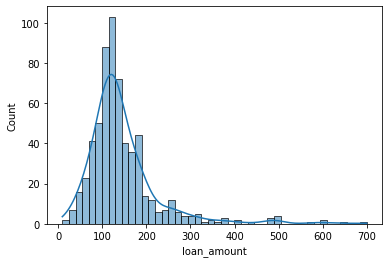

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


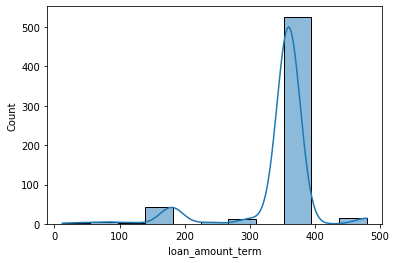

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


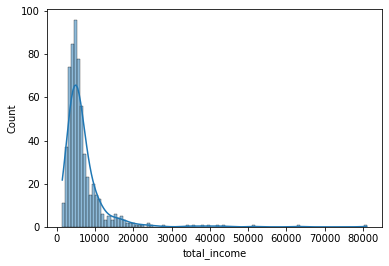

In [135]:
# Check Distribution of Numeric values & skewness

df_numerical = df.select_dtypes(include=['int64','float64'])

for col in df_numerical.columns:
  sns.histplot(df_numerical[col], kde=True)
  plt.show()

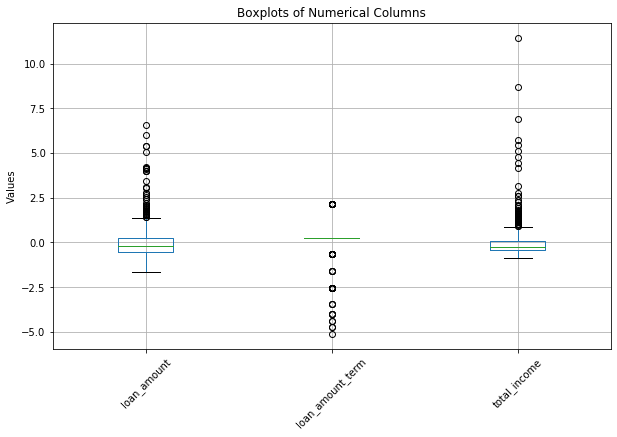

In [136]:
# Check Outliers

# Using Scaler to reletively see the outliers of all each columns with the numerical values
scaler = StandardScaler()


df_numerical_normalized = pd.DataFrame(scaler.fit_transform(df_numerical), columns=df_numerical.columns)


df_numerical_normalized.boxplot(figsize=(10, 6))
plt.title("Boxplots of Numerical Columns")
plt.ylabel("Values")
plt.xticks(rotation=45)

plt.show()


Here is the stats summary for the numerical features:
### Distribution
- **total_income**: the mean of total income is 7024, it looks normally distributed but skewed right. Also there are a fair amount of outlieres exist. 
- **loan-amount**: the average loan_amount is 146. The values are very well normally distributed, although it's sligthly right skewed.
- **loam_amount_term**: the average loan term is 342 days. It's normally distributed and the most loan term concentraded between 300-400 days. 
- **credit_history**: it's binary, yes or no
    
### Outliers
- there are quite a lot of outlieres identifeid from almost all numerical feautres. > it would be worthwhile to investigate how the profiles with outlieres are different from others in terms of loan approval. This will be explored further in EDA.

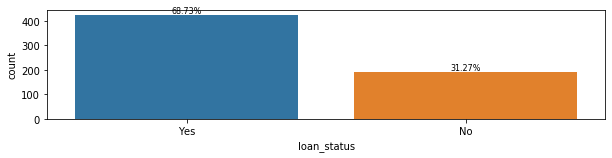

In [138]:
plt.figure(figsize=(10, 2))
ax = sns.countplot(x='loan_status', data=df)

total = len(df['loan_status'])
for p in ax.patches:
    height = p.get_height()
    percentage = f'{100 * height / total:.2f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=8)

plt.show()

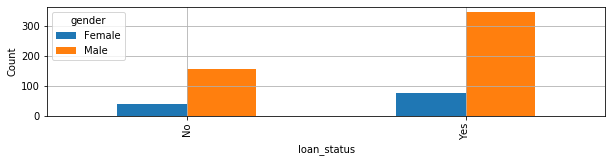

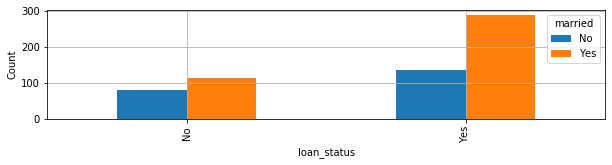

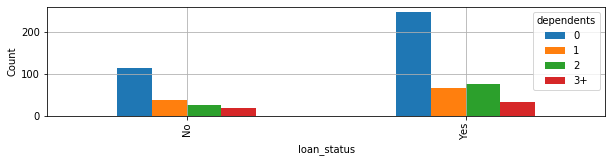

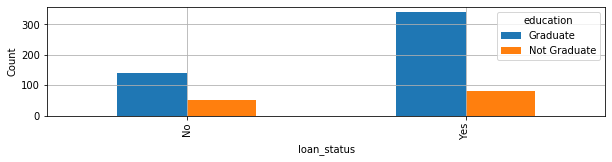

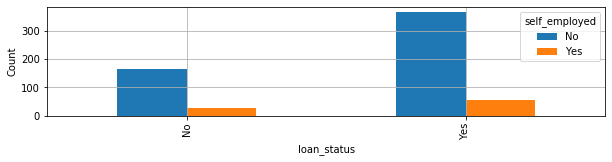

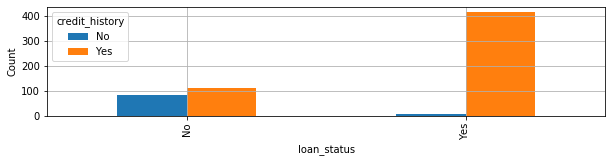

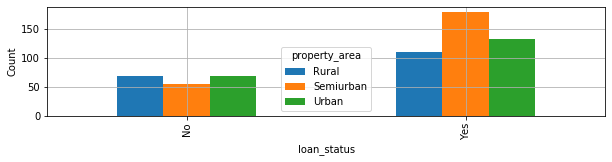

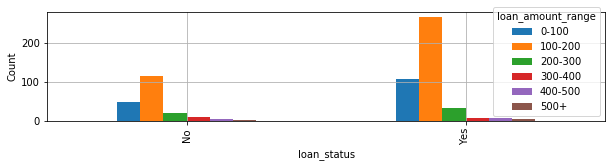

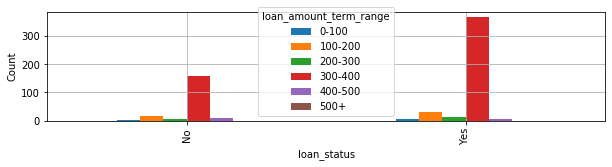

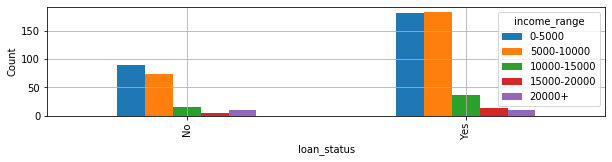

In [141]:
category_ls = ['gender', 'married', 'dependents', 'education',
       'self_employed', 'credit_history', 'property_area',
       'loan_amount_range', 'loan_amount_term_range', 'income_range']

for col in category_ls:
    cat_vs_cat=df.groupby(['loan_status', col])['loan_id'].count()
    cat_vs_cat = cat_vs_cat.unstack().fillna(0)
    ax = (cat_vs_cat).plot(
    kind='bar',
    figsize=(10, 2),
    grid=True
    )
    ax.set_ylabel('Count')
    plt.show()

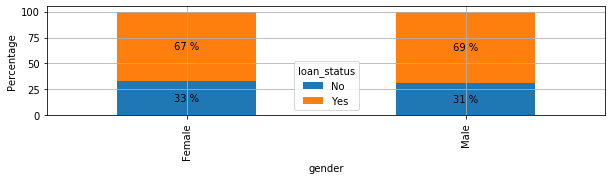

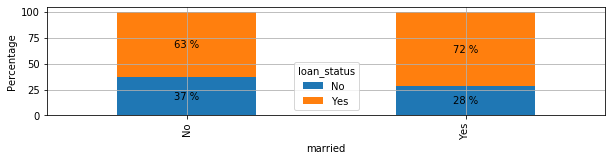

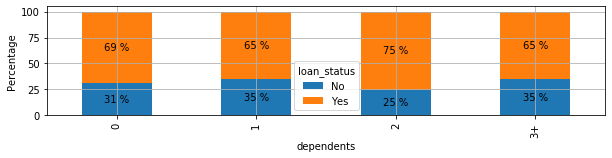

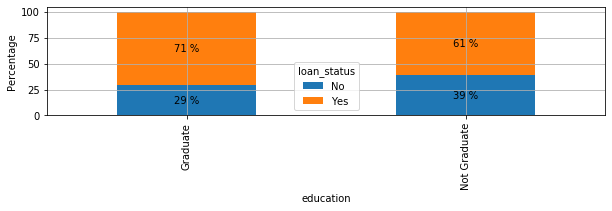

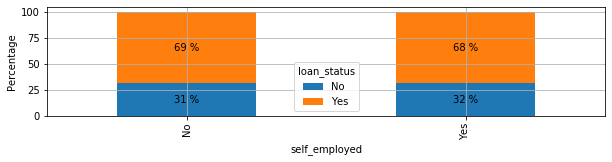

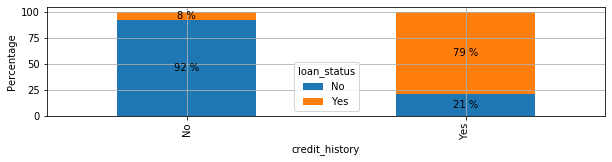

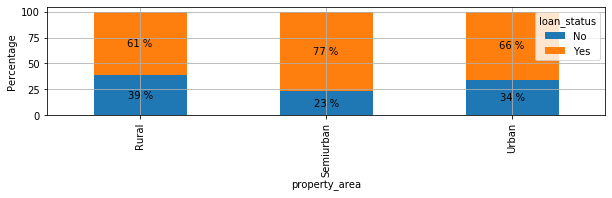

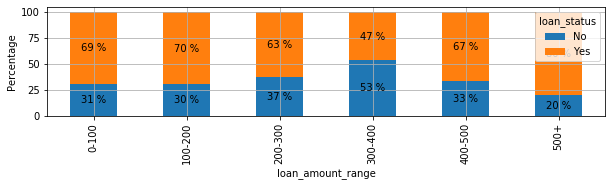

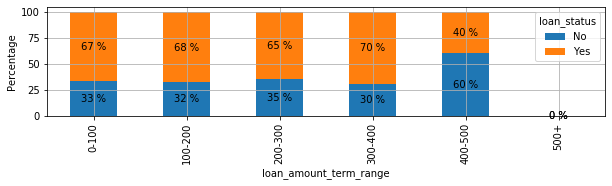

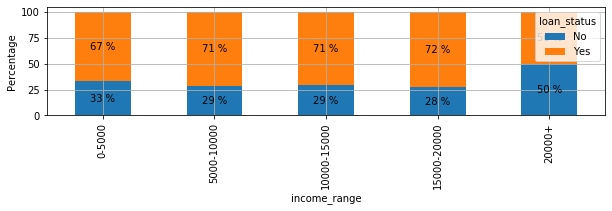

In [143]:
for col in category_ls:
    cat_vs_cat = df.groupby(['loan_status', col])['loan_id'].count()
    cat_vs_cat = cat_vs_cat.unstack().fillna(0)

    # Calculate the percentage of each loan_status per category
    cat_vs_cat_percentage = cat_vs_cat.divide(cat_vs_cat.sum(axis=0), axis=1) * 100

    ax = cat_vs_cat_percentage.T.plot(
        kind='bar',
        stacked=True,
        figsize=(10, 2),
        grid=True
    )
    
    # Adding the labels
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.text(x+width/2, 
                y+height/2, 
                '{:.0f} %'.format(height), 
                horizontalalignment='center', 
                verticalalignment='center')

    ax.set_ylabel('Percentage')
    plt.show()

In [150]:
for col in cats:
    
    # Create a contingency table
    contingency_table = pd.crosstab(df[col], df['loan_status'])

    # Convert the values to percentages
    row_sums = contingency_table.sum(axis=1)
    col_sums = contingency_table.sum(axis=0)
    
    contingency_table["No"] = contingency_table["No"] / contingency_table["No"].sum() * 100
    contingency_table["Yes"] = contingency_table["Yes"] / contingency_table["Yes"].sum() * 100

    # Print the contingency table in percentage
    display(contingency_table)

loan_status,No,Yes
gender,,
Female,19.270833,17.772512
Male,80.729167,82.227488


loan_status,No,Yes
married,,
No,41.145833,31.753555
Yes,58.854167,68.246445


loan_status,No,Yes
dependents,,
0,58.854167,58.530806
1,18.750000,15.639810
2,13.020833,18.009479
3+,9.375000,7.819905


loan_status,No,Yes
self_employed,,
No,86.458333,86.729858
Yes,13.541667,13.270142


loan_status,No,Yes
credit_history,,
No,42.708333,1.658768
Yes,57.291667,98.341232


# 5. Logistics Regression Analysis

## 5-1. Data Processing

## 5-2. Encoding